# Stage 2. Visulaize the Results

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.patches as mpatches
import pickle
from miscellaneous import calculate,training_reward_window,Get_Model_Behavior
%matplotlib inline
ticks_font = font_manager.FontProperties(family='helvetica',size=18,weight='bold')
legend_font = font_manager.FontProperties(family='helvetica',size=15)
font =  {'fontname':'helvetica'}

In [32]:
def plot_experiment(i,titl,xlbl,ylbl,window=400,typ='train',fs =(13,5)):
    """
    Plot an experiment 
    """
    tmp,perf = training_reward_window(window,i,typ)
    plt.figure(figsize=fs)
    ax = plt.subplot(1,1,1)
    lw=2
    ax.plot(tmp[:-1],c='b',label='Model',linewidth=lw)
    ax.plot(perf[:-1],c='r',label='Ground truth',linewidth=lw)
    ax.plot(perf[:-1]-tmp[:-1],c='g',label='difference',linewidth=lw)
    ax.set_title(titl.format(window),fontsize=20,**font)
    ax.set_xlabel(xlbl.format(window),fontsize=20,**font)
    ax.set_ylabel(ylbl,fontsize=20,**hfont)
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
    return ax


def plotdata(data,window,i=None):
    draw_data1 = Process_data(data[data[5]=='Test'],window)
    draw_data = Process_data(data[data[5]=='train'],window)
    for data_generic,kind in [(draw_data,'training'),(draw_data1,'Testing')]:
        
        plt.figure(figsize=(12,6))
        plt.plot(data_generic[:,0],c='green',label='eaten correctly')
        plt.plot(data_generic[:,1],c='red',label='eaten incorrectly')
        plt.plot(data_generic[:,2],c='blue',label='avoided correctly')
        plt.plot(data_generic[:,3],c='purple',label='avoided incorrectly')
        plt.xlabel('Sum of {} episode'.format(window))
        plt.ylabel('Count')
        plt.title('Over {} Episodes,Model:{}'.format(kind,i))
        plt.legend()
    
    return draw_data,draw_data1

def plot_experiment_7seeds(i,titl,xlbl,ylbl,window=400,typ='train',fs =(13,5)):
    global important_exp
    results = []
    min_length = np.inf
    for jj in np.arange(important_exp[i][0],important_exp[i][1]+1):
        tmp,perf = training_reward_window(window,jj,typ)
        if tmp.shape[0]<min_length:
            min_length = tmp.shape[0]
        results.append([tmp,perf])
    fresults = np.zeros((7,2,min_length))
    for i in range(len(results)):
        fresults[i,0]=results[i][0][:min_length]
        fresults[i,1]=results[i][1][:min_length]
    mn = fresults.mean(axis=(0))
    std = fresults.std(axis=(0))/np.sqrt(7)

    plt.figure(figsize=(13,5))
    ax = plt.subplot(1,1,1)
    xvalues = np.arange(0,mn.shape[1])
    
    ax.plot(xvalues,mn[0],color='b',label='Model')
    ax.fill_between(xvalues,mn[0]+std[0],mn[0]-std[0],alpha=0.2)

    ax.plot(xvalues,mn[1],color='r',label='Ground Truth')
    ax.fill_between(xvalues,mn[1]+std[1],mn[1]-std[1],alpha=0.2)
    
    ax.set_title(titl.format(window),fontsize=20,**font)
    ax.set_xlabel(xlbl.format(window),fontsize=20,**font)
    ax.set_ylabel(ylbl,fontsize=20,**font)
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
    return ax

### Plot bar

<h3>Best models allo/ego with allo/ego actions</h3>
<table align="left">
  <tr>
    <th>Actions\Vision</th>
    <th>Allo</th>
    <th>Ego</th>
  </tr>
  <tr>
    <th>Allo</th>
    <td>1336</td>
    <td>1440</td>
  </tr>
  <tr>
    <th>Ego</th>
    <td>1420</td>
    <td>1358</td>
  </tr>
</table>

In [33]:
# array structure(#cases,6 [0-avoid_i,1-avoid_l,2-ate_l,3-ate_i,4-total_should_eat,5-total_should_avoid])
cases_info = np.zeros((4,6))
cases_index={}
i = 0
for ego in (True,False): 
    for reverse in (True,False):
        cases_info[i][:4] = Get_Model_Behavior(Ego=ego,reverse=reverse)
        i+=1
#total should eat = ate legally + avoided ilegally.
cases_info[:,4] = cases_info[:,2]+cases_info[:,0]
# total shoud avoid = ate ilegally + avoided legall.
cases_info[:,5] = cases_info[:,1]+cases_info[:,3]
# To calculate the percentage out of 100%
cases_info[:,:4] = cases_info[:,:4]*100
cases_info[:,0] = cases_info[:,0]/cases_info[:,4]
cases_info[:,2] = cases_info[:,2]/cases_info[:,4]
cases_info[:,1] = cases_info[:,1]/cases_info[:,5]
cases_info[:,3] = cases_info[:,3]/cases_info[:,5]
N = 8
expected = np.concatenate([cases_info[:,2],cases_info[:,1]])
unexpected =np.concatenate([cases_info[:,0],cases_info[:,3]])
ind = np.concatenate([np.arange(0,1.9,0.6),np.arange(5,6.99,0.6)])

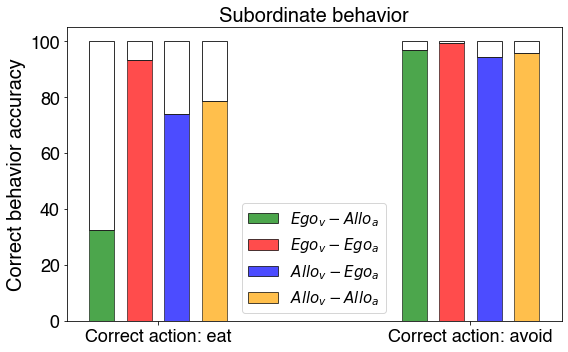

In [25]:
alpha =0.7
width = 0.4      # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
p1 = ax.bar(ind, expected, width,linewidth=0.8,edgecolor='black')
#colors = ('blue','orange','purple','yellow','blue','orange','purple','yellow')
colors = ('Green','red','blue','orange')*2

for bar,c in zip(p1,colors):
    bar.set_color(c)
    bar.set_ec('black')
    bar.set_alpha(alpha)
p2 = ax.bar(ind, unexpected, width,color = 'white',bottom=expected,linewidth=0.8,edgecolor='black')

ax.set_ylabel('Correct behavior accuracy',fontsize=20,**font)

ax.set_title('Subordinate behavior',fontsize=20,**font)
ls =['']
plt.setp(ax, xticks=ind, xticklabels=ls*N)
plt.setp(ax, xticks=[ind[:4].mean(),ind[4:].mean()], xticklabels=('Correct action: eat', 'Correct action: avoid'))
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
#plt.yticks(np.arange(0, 81, 10))

label = ('$Ego_v-Allo_a$','$Ego_{v}-Ego_{a}$','$Allo_v-Ego_a$','$Allo_v-Allo_a$')
circ = []
for cc,l in zip(colors[:4],label):
    circ.append(mpatches.Patch(edgecolor='black',facecolor=cc,label=l,alpha=alpha))
ax.legend(handles = circ,prop=legend_font)
ax.set_ylim((0,105))
plt.tight_layout()
plt.savefig('paper_images_2020/raw images/barplot_all.png')
plt.show()

## Training Reults reward

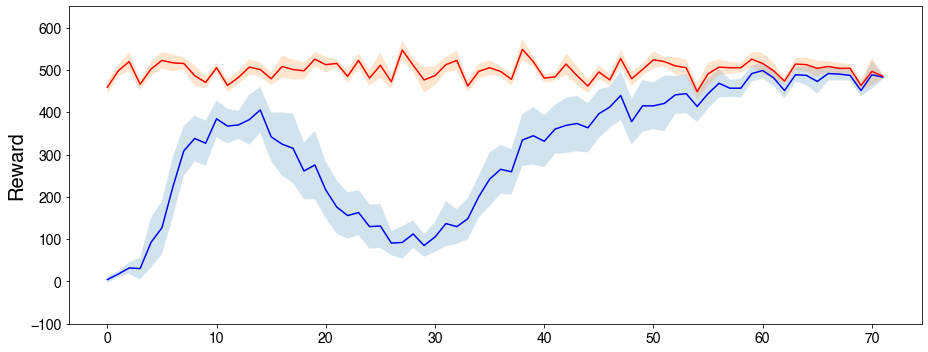

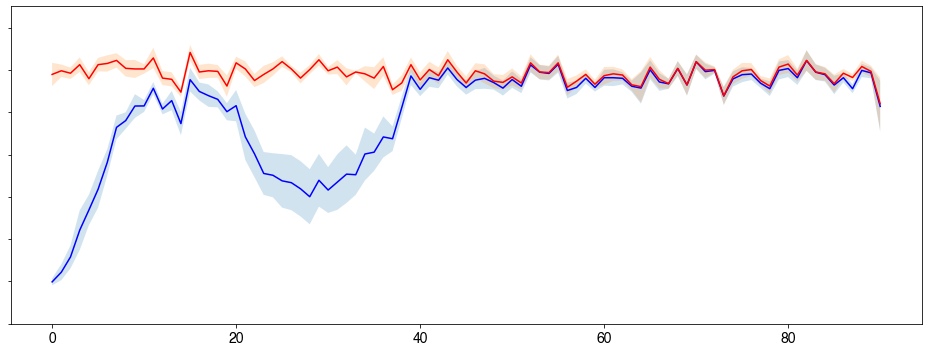

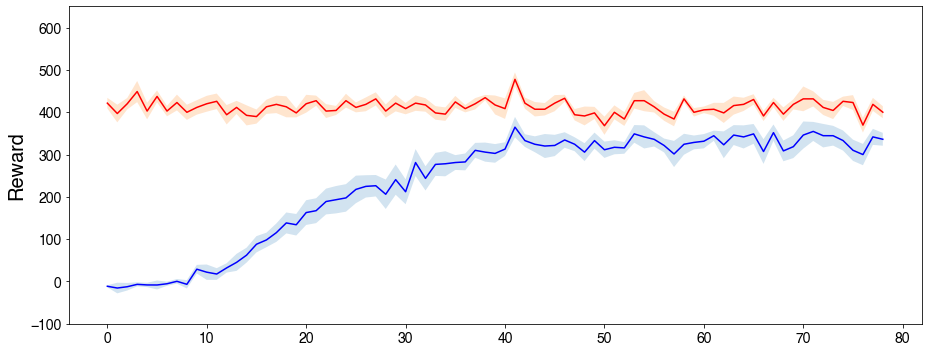

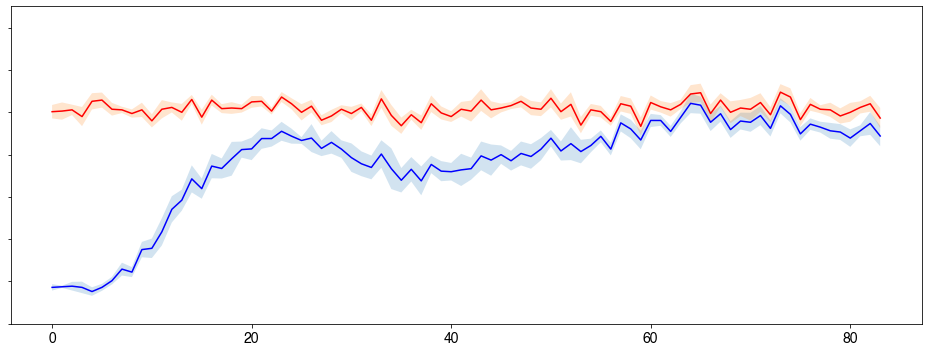

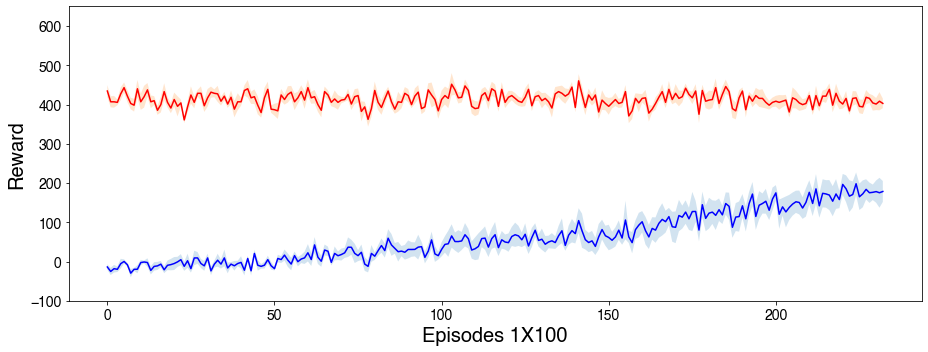

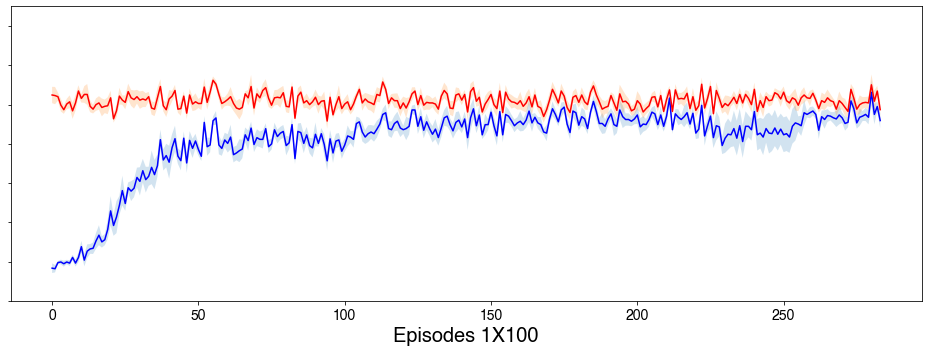

In [5]:
important_exp = {1318:[1318,1324,'Allo - L1 13x13 no obstacles layer'],
1325:[1325,1331,'A-L2'],
1332:[1332,1338,'A-L3'],
1339:[1339,1345,'E-L1,11x11 without my position layer'],
1346:[1346,1352,' E-L2'],
1353:[1353,1359,' E-L3']}

y_info ={1318:True,1339:False,1325:True,1346:False,1332:True,1353:False}
x_info ={1318:False,1339:False,1325:False,1346:False,1332:True,1353:True}
y_size ={1318:(13,5),1339:(12.1,5),1325:(13,5),1346:(12,5),1332:(13,5),1353:(12,5)}
#texts={1230:'a)',1246:'b)',1166:'c)',1252:'d)',1181:'e)',1265:'f)'}
for i in [1318,1339,1325,1346,1332,1353]:
 #   t+=1
 #   ax = plt.subplot(3,2,t)
    ax = plot_experiment_7seeds(i,titl='',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test',fs=y_size[i])
    ax.set_ylim(-100,650)
    if not y_info[i]:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        
    if not x_info[i]:
        ax.set_xlabel('')
    plt.tight_layout()

    plt.savefig('paper_images_2020/raw images/{}_std.png'.format(i),dpi=300)

## Reveresed vs normal actions

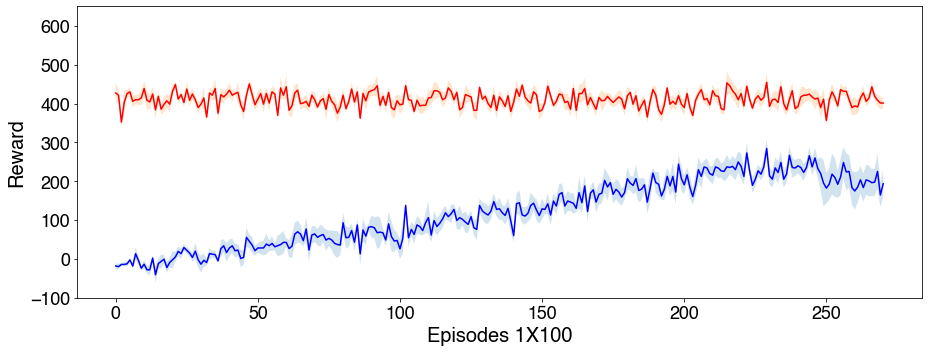

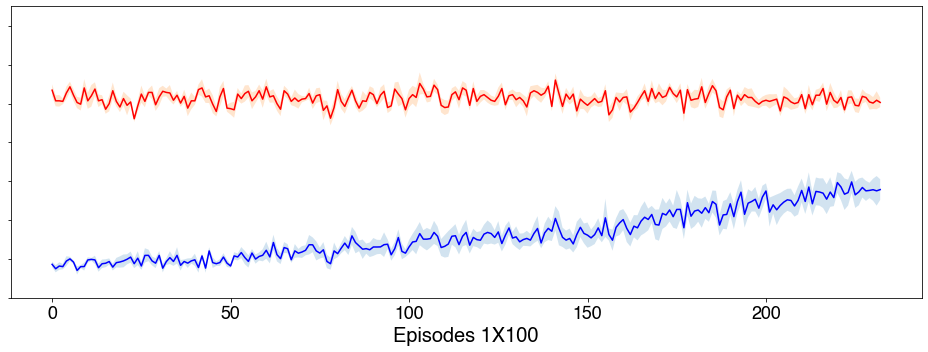

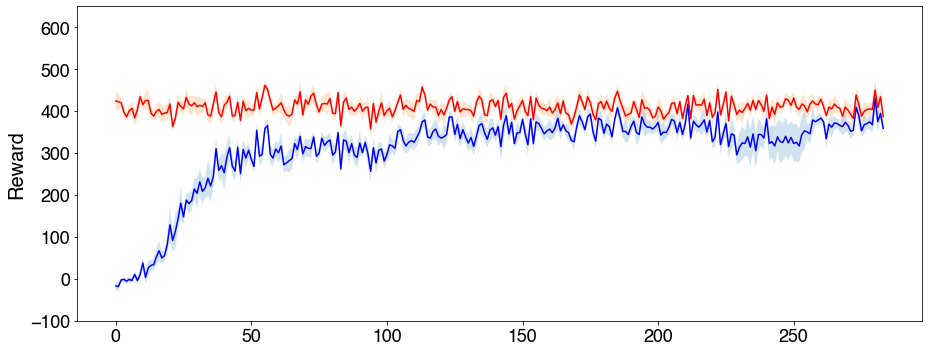

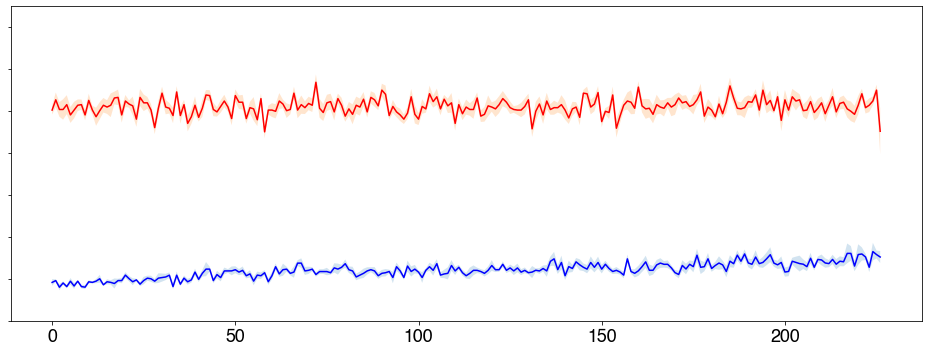

In [13]:
### Reveresed
important_exp = {1416:[1416,1422,' Allo-L3 -Rev'],1332:[1332,1338,'A-L3'],
                 1353:[1353,1359,' E-L3'],1437:[1437,1443,'Ego-L3-Rev']}
y_info ={1416:True,1332:False,1353:True,1437:False}
x_info ={1416:True,1332:True,1353:False,1437:False}
y_size ={1416:(12.1,5),1332:(13,5),1353:(12.1,5),1437:(13,5)}
#texts={1230:'a)',1246:'b)',1166:'c)',1252:'d)',1181:'e)',1265:'f)'}
for i in important_exp.keys():
 #   t+=1
 #   ax = plt.subplot(3,2,t)
    ax = plot_experiment_7seeds(i,titl='',
                xlbl='Episodes 1X{}',ylbl='Reward',window=100,typ='Test',fs=y_size[i])
    ax.set_ylim(-100,650)
    if not y_info[i]:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        
    if not x_info[i]:
        ax.set_xlabel('')
    plt.tight_layout()

    plt.savefig('paper_images_2020/raw images/{}_std_compare.png'.format(i),dpi=300)

## Suprvized difference

In [14]:
supervized_training_results = np.load('NPZ/val_train_acc_loss_E.npz')
ego_info = supervized_training_results['ego']
allo_info = supervized_training_results['allo']

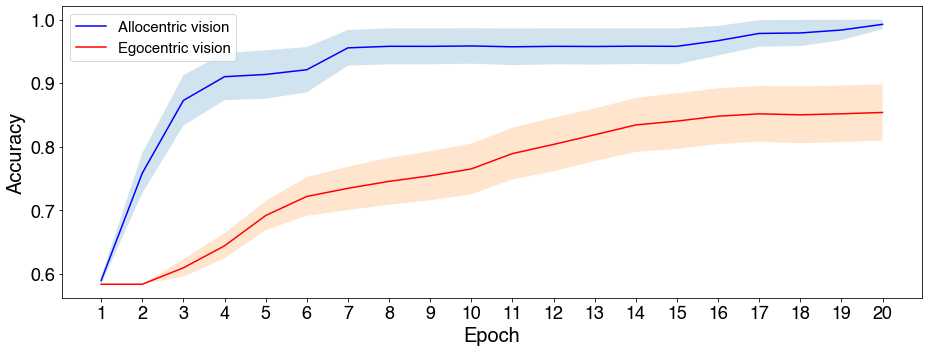

In [15]:
data = (allo_info,ego_info)
color = ('b','r')
labels= ('Allocentric vision','Egocentric vision')
plt.figure(figsize=(13,5))
ax = plt.subplot(1,1,1)
xvalues = np.arange(1,21)
for i in range(2):
    m,s = calculate(data[i],1)
    ax.plot(xvalues,m,color=color[i],label=labels[i])
    ax.fill_between(xvalues,m+s,m-s,alpha=0.2)
    ax.set_xlabel('Epoch',fontsize=20,**font)
    ax.set_ylabel('Accuracy',fontsize=20,**font)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
plt.xticks(np.arange(1,21,dtype=np.int),np.arange(1,21,dtype=np.int),minor=True)
ax.legend(prop=legend_font)
plt.tight_layout()
plt.savefig('paper_images_2020/raw images/allo_vs_ego_accuracy.png',dpi=300)

## Decoding the activations.

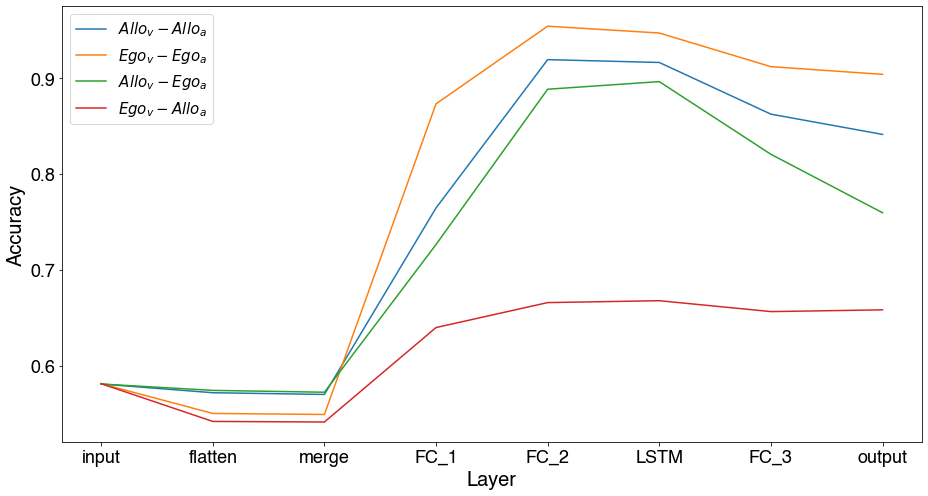

In [34]:
accuracies,models_description = pickle.load(open("NPZ/accuracies.pkl","rb"))
models_description[1336]= '$Allo_v-Allo_a$'
models_description[1440]= '$Ego_v-Allo_a$'
models_description[1420]= '$Allo_v-Ego_a$'
models_description[1358]='$Ego_v-Ego_a$'
plt.figure(figsize=(13,7))
ax = plt.subplot(1,1,1)
for i in [1336,1358,1420,1440]:
    ax.plot(accuracies[i][:,0,1],label=models_description[i])
plt.xticks(np.arange(0,8),['input','flatten','merge','FC_1','FC_2','LSTM','FC_3','output'])
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_xlabel('Layer',fontsize=20,**font)
ax.set_ylabel('Accuracy',fontsize=20,**font)
ax.legend(prop=legend_font)
plt.tight_layout()
plt.savefig('paper_images_2020/raw images/layer_accuracy.png',dpi=300)